# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [0]:
import requests
from bs4 import BeautifulSoup

u = "https://news.ycombinator.com//"
html = requests.get(u).content.decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
l = soup.findAll('td', attrs={'class': "title"})
#Getting the titles
titels = [t.text.strip() for t in l]
titels = [t for t in titels if not t.split('.')[0].isdigit()]
titels

['Linux 5.6 (kernel.org)',
 'Lead-Free Solder Is Better for You (bhencke.com)',
 'The origin story of the N95 mask (fastcompany.com)',
 'Microsoft: Cloud services demand up, prioritization rules in place (zdnet.com)',
 'Server-Side Only React with Next (webcloud.se)',
 'Show HN: RapidFuzz – A fast string matching library for Python (github.com)',
 "French companies benefiting from state aid can't buy back shares (reuters.com)",
 'Grab your crayons, it’s coloring time (colorabl.es)',
 'A Definitive Guide to Enabling Italics in Vim and Tmux (rsapkf.netlify.com)',
 'Neanderthals Feasted on Seafood, Seabirds, Perhaps Even Dolphins (nytimes.com)',
 'Covid-19 Sanity – Covid-19 papers from bioRxiv/medRxiv searchable and sortable (biomed-sanity.com)',
 'Coding Stories: Coding on the C64 (2015) (martinrue.com)',
 'Determining an Election in K (leahneukirchen.org)',
 'Cellular Automata: Rule 30 fed as input to Conway’s Game of Life (2019) [video] (youtube.com)',
 'An Ancient Ballcourt in Oaxaca 

In [0]:
l = soup.findAll('span', attrs={'class': "score"})
#Getting the votes
votes = [t.text.strip().split()[0] for t in l]
votes

['65',
 '198',
 '124',
 '418',
 '21',
 '54',
 '106',
 '230',
 '46',
 '29',
 '68',
 '25',
 '53',
 '91',
 '38',
 '35',
 '32',
 '62',
 '8',
 '119',
 '95',
 '322',
 '629',
 '30',
 '128',
 '19',
 '54',
 '68',
 '58',
 '222']

**Question 2**:  Write a function that collects data on four Harry Potter movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [0]:
!pip install tmdbv3api
from tmdbv3api import TMDb
from tmdbv3api import Movie

tmdb = TMDb()
tmdb.language = 'en'
tmdb.debug = True
movie = Movie()
search = movie.search('Harry Potter')

movies_index = 1
for res in search:
    print(res.id)
    print(res.title)
    print(res.overview)
    print(res.poster_path)
    print(res.vote_average)
    movies_index+=1
    if movies_index>4:
      break

INFO:tmdbv3api.tmdb:{'page': 1, 'total_results': 29, 'total_pages': 2, 'results': [{'popularity': 91.455, 'vote_count': 16071, 'video': False, 'poster_path': '/gHPtCmMeDqjaGqnMrWGDmD3nKd2.jpg', 'id': 671, 'adult': False, 'backdrop_path': '/hziiv14OpD73u9gAak4XDDfBKa2.jpg', 'original_language': 'en', 'original_title': "Harry Potter and the Philosopher's Stone", 'genre_ids': [12, 14, 10751], 'title': "Harry Potter and the Philosopher's Stone", 'vote_average': 7.8, 'overview': "Harry Potter has lived under the stairs at his aunt and uncle's house his whole life. But on his 11th birthday, he learns he's a powerful wizard -- with a place waiting for him at the Hogwarts School of Witchcraft and Wizardry. As he learns to harness his newfound powers with the help of the school's kindly headmaster, Harry uncovers the truth about his parents' deaths -- and about the villain who's to blame.", 'release_date': '2001-11-16'}, {'popularity': 66.384, 'vote_count': 13553, 'video': False, 'poster_path':

671
Harry Potter and the Philosopher's Stone
Harry Potter has lived under the stairs at his aunt and uncle's house his whole life. But on his 11th birthday, he learns he's a powerful wizard -- with a place waiting for him at the Hogwarts School of Witchcraft and Wizardry. As he learns to harness his newfound powers with the help of the school's kindly headmaster, Harry uncovers the truth about his parents' deaths -- and about the villain who's to blame.
/gHPtCmMeDqjaGqnMrWGDmD3nKd2.jpg
7.8
672
Harry Potter and the Chamber of Secrets
Cars fly, trees fight back, and a mysterious house-elf comes to warn Harry Potter at the start of his second year at Hogwarts. Adventure and danger await when bloody writing on a wall announces: The Chamber Of Secrets Has Been Opened. To save Hogwarts will require all of Harry, Ron and Hermione’s magical abilities and courage.
/sdEOH0992YZ0QSxgXNIGLq1ToUi.jpg
7.7
673
Harry Potter and the Prisoner of Azkaban
Harry, Ron and Hermione return to Hogwarts for ano

## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [0]:
# which question to answer - put your ID number and run the code 
your_id  = "<fill_your_id>"
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

**Question 1:** On average which project category received the highest number of backers? (15 pt) 

**Question 2:** On average which project category received the highest pledged USD? (15 pt)

**Question 3:** In which month is there the highest number of projects? (15 pt)

In [0]:
!mkdir ./datasets
!mkdir /root/.kaggle/
import json
import os
from datetime import datetime
import pandas as pd

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

!mkdir ./datasets/kickstarter
!kaggle datasets download kemical/kickstarter-projects -p ./datasets/kickstarter
!unzip ./datasets/kickstarter/kickstarter-projects.zip -d ./datasets/kickstarter/

df = pd.read_csv('./datasets/kickstarter/ks-projects-201801.csv')
df['launched_datetime'] = pd.to_datetime(df['launched'], infer_datetime_format=True)
df['launched_month'] = df['launched_datetime'].apply(lambda x: x.month)
g = df.groupby(['launched_month'])
project_counts_per_months = g.size().to_frame (name='counts').sort_values('counts', ascending=0)
project_counts_per_months

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘/root/.kaggle/’: File exists
 87% 32.0M/36.8M [00:00<00:00, 122MB/s]
100% 36.8M/36.8M [00:00<00:00, 146MB/s]
Archive:  ./datasets/kickstarter/kickstarter-projects.zip
  inflating: ./datasets/kickstarter/ks-projects-201612.csv  
  inflating: ./datasets/kickstarter/ks-projects-201801.csv  


,counts
launched_month,
7,36367
3,33946
10,33490
11,32890
5,32888
6,32623
8,32291
4,32260
9,31069


**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

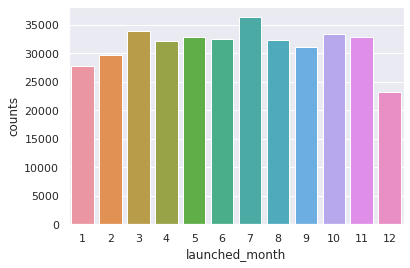

In [0]:
import seaborn as sns 
sns.set(style="darkgrid")
project_counts_per_months.reset_index(inplace=True)
sns.barplot(x="launched_month", y="counts", data=project_counts_per_months)

## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  Pandas, please answer one of following questions:

**Question 1:** Write code which calculate the top-10 most friendly characters, i.e., characters with the 
    highest number of friends. Please use _hero_network.csv_ file (15pt). 
    
**Note:** Not all the links in this dataset are symmetric.

In [4]:
!mkdir ./datasets
!mkdir /root/.kaggle/
import json
import os
import pandas as pd

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
!mkdir ./datasets/marvel
!kaggle datasets download csanhueza/the-marvel-universe-social-network -p ./datasets/marvel
!unzip ./datasets/marvel/the-marvel-universe-social-network.zip -d ./datasets/marvel/

nodes_df = pd.read_csv('./datasets/marvel/nodes.csv')
edges_df = pd.read_csv('./datasets/marvel/edges.csv')
hero_network_df = pd.read_csv('./datasets/marvel/hero-network.csv')
# set hero_network_df to symetric releations
cols = hero_network_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
hero_network_symmetrical_df = hero_network_df[cols] 
hero_network_symmetrical_df.rename(columns={'hero1': 'hero2', 'hero2': 'hero1'}, inplace=True)
hero_network_symmetrical_df = pd.concat([hero_network_df, hero_network_symmetrical_df], axis=0, sort=False)
hero_network_symmetrical_df = hero_network_symmetrical_df.drop_duplicates(keep='first')
hero_network_symmetrical_df = hero_network_symmetrical_df[hero_network_symmetrical_df['hero1'] != hero_network_symmetrical_df['hero2']]

group_by_hero = hero_network_symmetrical_df.groupby(['hero1'])
hero_friends_count = group_by_hero.size().to_frame (name='friends_counts').sort_values('friends_counts', ascending=0)
hero_friends_count.head(10)

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘/root/.kaggle/’: File exists
mkdir: cannot create directory ‘./datasets/marvel’: File exists
the-marvel-universe-social-network.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/marvel/the-marvel-universe-social-network.zip
replace ./datasets/marvel/edges.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./datasets/marvel/hero-network.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./datasets/marvel/nodes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


,friends_counts
hero1,
CAPTAIN AMERICA,1906
SPIDER-MAN/PETER PAR,1737
IRON MAN/TONY STARK,1522
THING/BENJAMIN J. GR,1416
MR. FANTASTIC/REED R,1379
WOLVERINE/LOGAN,1371
HUMAN TORCH/JOHNNY S,1361
SCARLET WITCH/WANDA,1325
THOR/DR. DONALD BLAK,1289


**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

In [5]:
!pip install networkx
hero_friends_count.reset_index(inplace=True)
most_friendly_heros = hero_friends_count.iloc[:150]
verticies = set(most_friendly_heros['hero1'])
edges = []
group_by_hero = hero_network_symmetrical_df.groupby(['hero1'])
for hero in verticies:
  current_hero_friends_df = group_by_hero.get_group(hero)
  for index, row in current_hero_friends_df.iterrows():
    hero_friend = row['hero2']
    if hero_friend in verticies:
      edges.append((hero, hero_friend))

import networkx as nx
%matplotlib inline 

g = nx.Graph()
g.add_edges_from(set(edges))
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 150\nNumber of edges: 8398\nAverage degree: 111.9733'

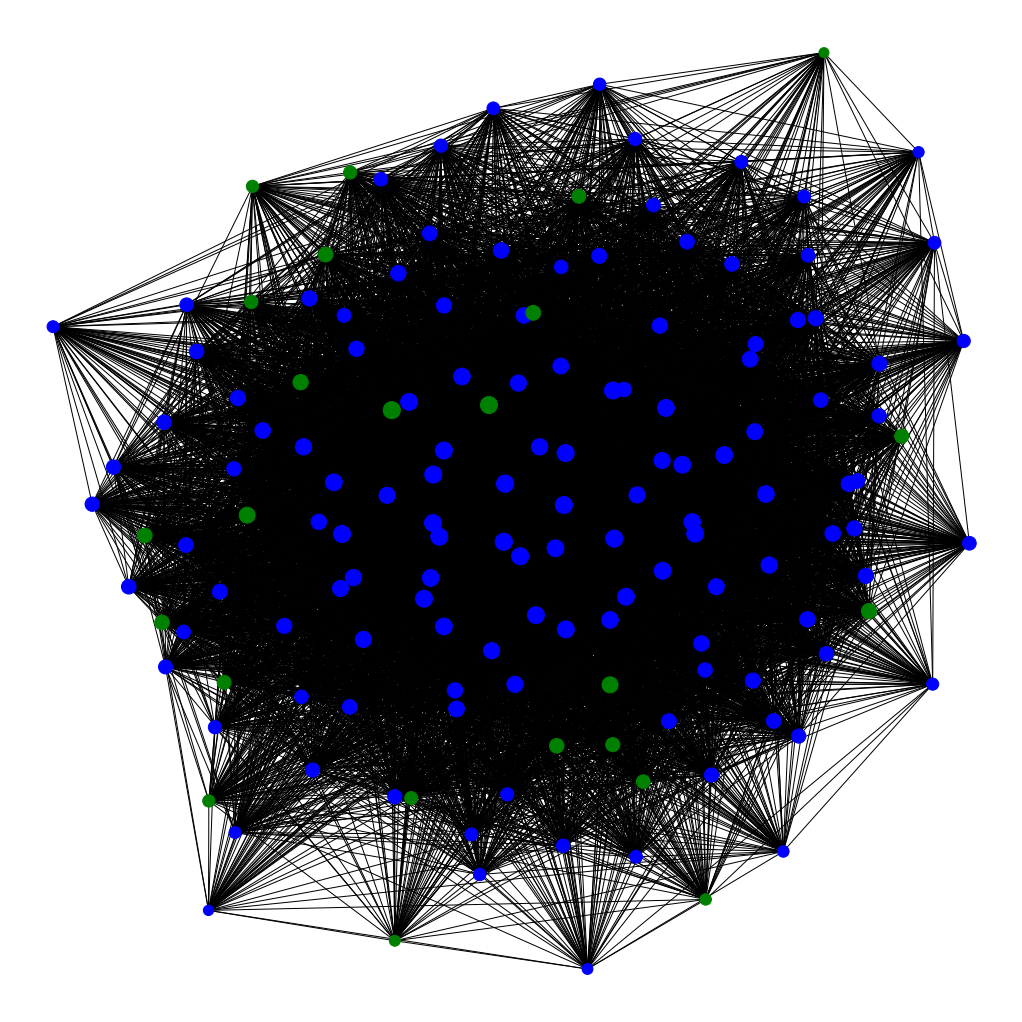

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

# create colors dict
character_type = list(nodes_df['type'].unique())
colors = ['red', 'blue']
colors_dict = dict(zip(character_type, colors))
heros_names = pd.Series([i[0] for i in g.nodes(data=True)])
heros_names = heros_names.rename('node')
heros_names_and_colors = nodes_df.merge(heros_names, on='node', how='right') 
heros_names_and_colors['color'] = heros_names_and_colors['type'].apply(lambda x: 'green' if x!=x else colors_dict[x])
# hero_friends_count.rename(columns={'hero1':'node'}, inplace=True)
# heros_names_and_colors.merge(hero_friends_count, on='node' how='left')
# heros_names_and_colors['size'] = heros_names_and_colors
verticies_degree = nx.degree(g)

plt.figure(3,figsize=(14,14))
nx.draw_spring(g, with_labels=False, node_color=heros_names_and_colors['color'].values, node_size=[v*2 for k, v in verticies_degree])

**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) (10pt)

In [0]:
nx.write_gml(g,'./datasets/marvel/marvel_graph.gml')


[marvel graph with Gephi, filtered nodes with less then 140 edges](https://drive.google.com/open?id=1HngacZHdjxHbCmkuY1I4AMA7C5RvA8YN)